In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 366.3 kB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 651.6 kB/s eta 0:00:000:00:01m eta 0:00:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.7
    Uninstalling pytz-2018.7:
      Successfully uninstalled pytz-2018.7


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/home/meherrushi/Downloads/t2fdata/twcs.csv')

In [5]:
df.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [7]:
df = df.drop('created_at',axis=1)

In [8]:
df.head()

,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,@sprintcare I did.,4,6.0


In [9]:
df.shape

(2811774, 6)

In [10]:
df['text'][:15]

0     @115712 I understand. I would like to assist y...
1         @sprintcare and how do you propose we do that
2     @sprintcare I have sent several private messag...
3     @115712 Please send us a Private Message so th...
4                                    @sprintcare I did.
5     @115712 Can you please send us a private messa...
6             @sprintcare is the worst customer service
7     @115713 This is saddening to hear. Please shoo...
8     @sprintcare You gonna magically change your co...
9     @115713 We understand your concerns and we'd l...
10    @sprintcare Since I signed up with you....Sinc...
11    @115713 H there! We'd definitely like to work ...
12    @115714 y’all lie about your “great” connectio...
13    @115715 Please send me a private message so th...
14    @115714 whenever I contact customer support, t...
Name: text, dtype: object

In [11]:
df.author_id.value_counts()

AmazonHelp      169840
AppleSupport    106860
Uber_Support     56270
SpotifyCares     43265
Delta            42253
                 ...  
456282               1
456281               1
456280               1
456276               1
823870               1
Name: author_id, Length: 702777, dtype: int64

In [12]:
x = df.author_id.value_counts().to_numpy().tolist()

In [13]:
sns.countplot(x='author_id',data = df)

KeyboardInterrupt: 

In [14]:
amazon_df = df.loc[df.author_id == 'AmazonHelp']
apple_df = df.loc[df.author_id == 'AppleSupport']

In [15]:
amazon_df.head()

,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
181,269,AmazonHelp,False,@115770 こんにちは、アマゾン公式です。Fire TV Stickが見れないというのは...,"270,271",272.0
184,273,AmazonHelp,False,@115770 カスタマーサービスにてお問い合わせ済みとのことで、お手数をおかけいたしました...,274,271.0
186,275,AmazonHelp,False,@115770 恐れ入ります。至らない点も多々あるかとは存じますが、今後ともどうぞよろしくお...,NaN,274.0
234,324,AmazonHelp,False,@115792 ご不便をおかけしております。アプリをご利用でしょうか。強制停止&gt;端末の...,NaN,325.0
321,615,AmazonHelp,False,@115820 I'm sorry we've let you down! Without ...,616,617.0


In [16]:
apple_df.head()

,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
396,696,AppleSupport,False,@115854 We're here for you. Which version of t...,697,698.0
398,699,AppleSupport,False,@115854 Lets take a closer look into this issu...,NaN,697.0
401,701,AppleSupport,False,@115855 Let's go to DM for the next steps. DM ...,NaN,702.0
403,703,AppleSupport,False,@115855 Any steps tried since it started last ...,702,704.0
405,705,AppleSupport,False,@115855 That's great it has iOS 11.1 as we can...,"706,704",707.0


In [17]:
apple_df['text'][34:45]

/tmp/ipykernel_21059/1243904116.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  apple_df['text'][34:45]


1172    @116100 This article should help with that: ht...
1174    @116100 Try contacting our iTunes Store team h...
1177    @116101 Thanks for clarifying. Let's meet in D...
1179    @116101 We're happy to help. Has Home Sharing ...
1181    @116102 Which model do you have and is iOS 11....
1183    @116102 To make sure, is iOS 11.1 showing here...
1185    @116103 We'll make sure to get this straighten...
1188    @116102 We want you to be able to make calls o...
1190    @116104 Let us look into that. What device and...
1192    @116105  We want to help.  Send us a DM lettin...
1194    @116106 We offer support via Twitter in Englis...
Name: text, dtype: object

In [18]:
apple_df.describe

<bound method NDFrame.describe of          tweet_id     author_id  inbound  \
396           696  AppleSupport    False   
398           699  AppleSupport    False   
401           701  AppleSupport    False   
403           703  AppleSupport    False   
405           705  AppleSupport    False   
...           ...           ...      ...   
2811310   2987499  AppleSupport    False   
2811419   2987604  AppleSupport    False   
2811421   2987606  AppleSupport    False   
2811483   2987662  AppleSupport    False   
2811541   2987722  AppleSupport    False   

                                                      text response_tweet_id  \
396      @115854 We're here for you. Which version of t...               697   
398      @115854 Lets take a closer look into this issu...               NaN   
401      @115855 Let's go to DM for the next steps. DM ...               NaN   
403      @115855 Any steps tried since it started last ...               702   
405      @115855 That's great it has 

In [19]:
apple_df.reset_index()

,index,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
0,396,696,AppleSupport,False,@115854 We're here for you. Which version of t...,697,698.0
1,398,699,AppleSupport,False,@115854 Lets take a closer look into this issu...,NaN,697.0
2,401,701,AppleSupport,False,@115855 Let's go to DM for the next steps. DM ...,NaN,702.0
3,403,703,AppleSupport,False,@115855 Any steps tried since it started last ...,702,704.0
4,405,705,AppleSupport,False,@115855 That's great it has iOS 11.1 as we can...,"706,704",707.0
...,...,...,...,...,...,...,...
106855,2811310,2987499,AppleSupport,False,@823737 We're happy to help out with your conc...,2987500,2987501.0
106856,2811419,2987604,AppleSupport,False,@689907 We're certainly glad to get you pointe...,NaN,2987605.0
106857,2811421,2987606,AppleSupport,False,@823765 We'd love to help! Which device are yo...,NaN,2987607.0
106858,2811483,2987662,AppleSupport,False,@823779 We'd like to help. Send us a DM and we...,NaN,2987663.0


In [20]:
apple_df[pd.isnull(apple_df.response_tweet_id)]

,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
398,699,AppleSupport,False,@115854 Lets take a closer look into this issu...,NaN,697.0
401,701,AppleSupport,False,@115855 Let's go to DM for the next steps. DM ...,NaN,702.0
414,716,AppleSupport,False,@115857 We'd like to investigate further with ...,NaN,717.0
418,720,AppleSupport,False,@115859 We've received your DM and will contin...,NaN,721.0
422,724,AppleSupport,False,"@115860 Reach out to us via DM, and we can tak...",NaN,725.0
...,...,...,...,...,...,...
2811294,2987481,AppleSupport,False,@823733 Let's figure out why this is happening...,NaN,2987482.0
2811419,2987604,AppleSupport,False,@689907 We're certainly glad to get you pointe...,NaN,2987605.0
2811421,2987606,AppleSupport,False,@823765 We'd love to help! Which device are yo...,NaN,2987607.0
2811483,2987662,AppleSupport,False,@823779 We'd like to help. Send us a DM and we...,NaN,2987663.0


In [21]:
df.inbound.dtype

dtype('bool')

In [22]:
qdf = df.loc[df.inbound == True]

In [23]:
qdf = df.loc[df.inbound == True]

In [24]:
qdf.shape

(1537843, 6)

In [25]:
qdf.head()

,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,@sprintcare I have sent several private messag...,1,4.0
4,5,115712,True,@sprintcare I did.,4,6.0
6,8,115712,True,@sprintcare is the worst customer service,"9,6,10",NaN
8,12,115713,True,@sprintcare You gonna magically change your co...,"11,13,14",15.0


In [26]:
qdf['text'][30:45]

/tmp/ipykernel_21059/3401817474.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  qdf['text'][30:45]


55    .@VerizonSupport @115725 @115726              ...
57              @115725 fix your app it won't even open
59    @ChipotleTweets @ChipotleTweets Becky is very ...
60    @ChipotleTweets @28 \nI don't fit in my Veggie...
62    @ChipotleTweets messed up today and didn’t giv...
64    hey @ChipotleTweets wanna come to Mammoth. I'l...
66    @ChipotleTweets I had excellent service tonigh...
68    When you're the only one in costume #boorito @...
70    @ChipotleTweets no Diet Coke and a literal bon...
72    @ChipotleTweets If you get queso or quac on yo...
75    Happy Halloween! Since I'm too old to trick or...
77    @ChipotleTweets Thank you @ChipotleTweets for ...
78    So frustrated with @ChipotleTweets 😡 Ordered d...
80    Btw @ChipotleTweets giving out $3 burritos if ...
82      @ChipotleTweets Tried, didn't work. How rude :/
Name: text, dtype: object

In [27]:
qdf.reset_index()

,index,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
0,1,2,115712,True,@sprintcare and how do you propose we do that,NaN,1.0
1,2,3,115712,True,@sprintcare I have sent several private messag...,1,4.0
2,4,5,115712,True,@sprintcare I did.,4,6.0
3,6,8,115712,True,@sprintcare is the worst customer service,"9,6,10",NaN
4,8,12,115713,True,@sprintcare You gonna magically change your co...,"11,13,14",15.0
...,...,...,...,...,...,...,...
1537838,2811765,2987944,823868,True,@AirAsiaSupport \n\nI am unable to do web chec...,2987943,NaN
1537839,2811768,2987946,524544,True,@VirginTrains Hope you are well? Does the 9.30...,2987945,NaN
1537840,2811770,2987948,823869,True,@115714 wtf!? I’ve been having really shitty s...,2987947,NaN
1537841,2811771,2812240,121673,True,@143549 @sprintcare You have to go to https://...,NaN,2812239.0


In [28]:
qdf.loc[2811770,'text']

'@115714 wtf!? I’ve been having really shitty service all day !! Get your shit together!'

In [29]:
qdfl = qdf['text'].tolist()

In [30]:
qdf.head()

,tweet_id,author_id,inbound,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,@sprintcare I have sent several private messag...,1,4.0
4,5,115712,True,@sprintcare I did.,4,6.0
6,8,115712,True,@sprintcare is the worst customer service,"9,6,10",NaN
8,12,115713,True,@sprintcare You gonna magically change your co...,"11,13,14",15.0


In [31]:
import re,string

In [32]:
tagging_regex = re.compile(r"@\S*")
url_pattern = re.compile(r'https?://\S+|www\.\S+')
signature_pattern = re.compile(r"-\S*")

chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My Ass Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait",
    "IMMA": "I am going to",
    "2NITE": "tonight",
    "DMED": "mesaged",
    'DM': "message",
    "SMH": "I am dissapointed"
}

# Thanks to https://stackoverflow.com/a/43023503/3971619
contractions = {
    "ain't": "are not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he shall have / he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
}

# Reference : https://stackoverflow.com/a/49986645/3971619
def remove_nonascii(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

def remove_url(string):
    return url_pattern.sub(r'', string)

def remove_chat_words_and_contractions(string):
    new_text = []
    for word in string.split(' '):
        if word.upper() in chat_words.keys():
            new_text += chat_words[word.upper()].lower().split(' ')
        if word.lower() in contractions.keys():
            new_text += contractions[word.lower()].split(' ')
        else:
            new_text.append(word)
            
    return ' '.join(new_text)

def remove_signature(text):
    return signature_pattern.sub(r'', text)
    

def clean_message(row):

    # Remove user taggings
    row.text = re.sub(tagging_regex, '',row.text)
    
    # Remove the emojis
    row.text = remove_nonascii(row.text)
    
    # Remove urls
    row.text = remove_url(row.text)
    
    # Remove signatures
    row.text = remove_signature(row.text)
    
    # Remove the chat words and contractions
    row.text = remove_chat_words_and_contractions(row.text)
    
    
    # Remove start and end whitespace
    row.text = row.text.strip()
    
    # Make multiple spaces become a single space
    row.text = ' '.join(row.text.split())
    
    # Lower case the message
    row.text = row.text.lower()
    
    return row

In [33]:
qdft = qdf[['text']]
qdft

,text
1,@sprintcare and how do you propose we do that
2,@sprintcare I have sent several private messag...
4,@sprintcare I did.
6,@sprintcare is the worst customer service
8,@sprintcare You gonna magically change your co...
...,...
2811765,@AirAsiaSupport \n\nI am unable to do web chec...
2811768,@VirginTrains Hope you are well? Does the 9.30...
2811770,@115714 wtf!? I’ve been having really shitty s...
2811771,@143549 @sprintcare You have to go to https://...


In [34]:
qdft = qdft.apply(clean_message,axis = 'columns')
qdft

,text
1,and how do you propose we do that
2,i have sent several private messages and no on...
4,i did.
6,is the worst customer service
8,you gonna magically change your connectivity f...
...,...
2811765,i am unable to do web checkin. i am getting th...
2811768,hope you are well? does the 9.30am train from ...
2811770,wtf!? ive been having really shitty service al...
2811771,you have to go to and ask them to add the hulu...


In [35]:
qdft.reindex()

,text
1,and how do you propose we do that
2,i have sent several private messages and no on...
4,i did.
6,is the worst customer service
8,you gonna magically change your connectivity f...
...,...
2811765,i am unable to do web checkin. i am getting th...
2811768,hope you are well? does the 9.30am train from ...
2811770,wtf!? ive been having really shitty service al...
2811771,you have to go to and ask them to add the hulu...


In [36]:
qdftl = qdft['text'].tolist()

Till now I considered the text prerprocessing for using the classification transformer .

but know I will preprocess for the n_gram counting and clustering


In [39]:
!pip install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 822.1 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 638.9 kB/s eta 0:00:0031m2.0 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 1.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 866.9 kB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 2.3 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 1.7 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.0/911.0 kB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 2.4 MB/s eta 0:00:00m eta 0:00:01:01:01


In [40]:
import re
import nltk
import spacy
import string

In [47]:
### removal of stop words

In [43]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

qdft["text_wo_punct"] = qdft["text"].apply(lambda text: remove_punctuation(text))

qdft_cl = qdft[['text_wo_punct']]

qdft.drop(["text_wo_punct"], axis=1, inplace=True)

qdft_cl.head()

,text_wo_punct
1,and how do you propose we do that
2,i have sent several private messages and no on...
4,i did
6,is the worst customer service
8,you gonna magically change your connectivity f...


In [46]:
qdft_cl

,text_wo_punct
1,and how do you propose we do that
2,i have sent several private messages and no on...
4,i did
6,is the worst customer service
8,you gonna magically change your connectivity f...
...,...
2811765,i am unable to do web checkin i am getting the...
2811768,hope you are well does the 930am train from cr...
2811770,wtf ive been having really shitty service all ...
2811771,you have to go to and ask them to add the hulu...


In [45]:
qdft

,text
1,and how do you propose we do that
2,i have sent several private messages and no on...
4,i did.
6,is the worst customer service
8,you gonna magically change your connectivity f...
...,...
2811765,i am unable to do web checkin. i am getting th...
2811768,hope you are well? does the 9.30am train from ...
2811770,wtf!? ive been having really shitty service al...
2811771,you have to go to and ask them to add the hulu...


In [55]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:01:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 4.1 MB/s eta 0:00:00m eta 0:00:010:00:01


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [94]:
docs = qdft_cl['text_wo_punct'].values.tolist()
print(docs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [97]:
docs[:5]

['and how do you propose we do that',
 'i have sent several private messages and no one is responding as usual',
 'i did',
 'is the worst customer service',
 'you gonna magically change your connectivity for me and my whole family ']

In [90]:
type(docs[0])

str

In [99]:
len(docs)

1537843

In [61]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 kB 523.8 kB/s eta 0:00:000:00:01m eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [71]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [117]:
cv = CountVectorizer(stop_words='english',
                     analyzer='word',
                    ngram_range = (1,1),
                    min_df = 50)
docs_cv = cv.fit_transform(docs)
docs_cv.shape

(1537843, 13156)

In [129]:
len(cv.get_feature_names_out())

13156

In [124]:
cv.vocabulary_.items()

dict_items([('propose', 9208), ('sent', 10425), ('private', 9119), ('messages', 7481), ('responding', 9888), ('usual', 12385), ('did', 3720), ('worst', 12981), ('customer', 3335), ('service', 10454), ('gonna', 5328), ('magically', 7203), ('change', 2486), ('connectivity', 2972), ('family', 4689), ('signed', 10648), ('day', 3436), ('yall', 13067), ('lie', 6903), ('great', 5392), ('connection', 2970), ('bars', 1650), ('lte', 7140), ('wont', 12944), ('load', 7026), ('smh', 10798), ('contact', 3011), ('support', 11374), ('tell', 11614), ('enabled', 4287), ('account', 789), ('years', 13082), ('tried', 12035), ('like', 6926), ('email', 4256), ('copy', 3093), ('spectrum', 10972), ('updating', 12326), ('training', 11972), ('received', 9545), ('corporate', 3106), ('office', 8166), ('correct', 3109), ('way', 12735), ('consent', 2981), ('form', 4998), ('does', 3937), ('need', 7878), ('local', 7036), ('incorrect', 6087), ('information', 6145), ('maintain', 7224), ('date', 3421), ('actually', 839),

In [ ]:
def get_top_ngram(corpus, n_min=1,n_max =1):
    cv = CountVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (n_min,n_max))
    docs_cv = cv.fit_transform(corpus)
    sum_words = docs_cv.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
    for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [127]:
get_top_ngram(doc,1,1)

[('just', 118630),
 ('service', 86724),
 ('thanks', 84762),
 ('help', 83822),
 ('time', 71688),
 ('phone', 68099),
 ('like', 56170),
 ('im', 54603),
 ('need', 54398),
 ('customer', 54243)]

<AxesSubplot: >

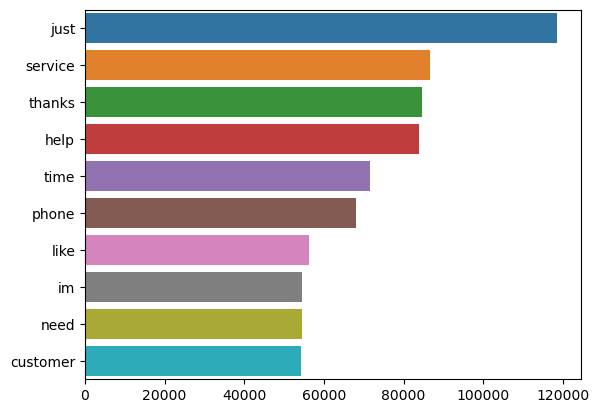

In [131]:
top_unigrams = get_top_ngram(doc,1,1)
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x)

<AxesSubplot: >

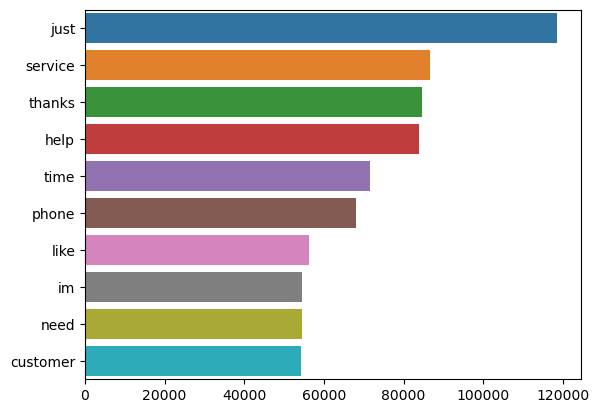

In [132]:
top_bigrams = get_top_ngram(doc,2,2)
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x)

<AxesSubplot: >

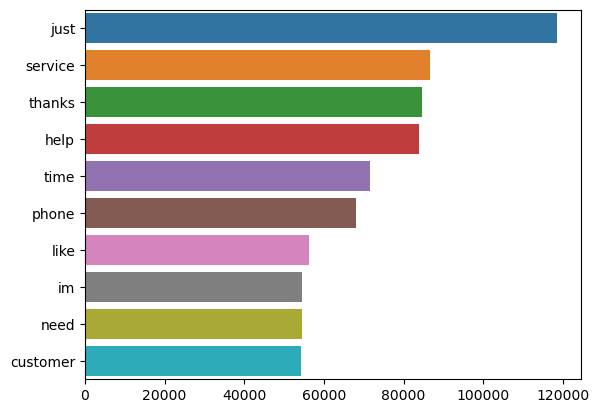

In [133]:
top_trigrams = get_top_ngram(doc,3,3)
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x)

In [136]:
tfidf_vec = TfidfVectorizer(stop_words='english',
                        ngram_range = (1,1),
                        min_df=50)
docs_tf = tfidf_vec.fit_transform(docs)
docs_tf.shape

(1537843, 13156)

In [138]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the training data 
kmeans = KMeans(n_clusters=5).fit(docs_tf)

# Get the labels using KMeans
pred_labels = kmeans.labels_

/home/meherrushi/miniconda3/envs/e2f/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [139]:
pred_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [64]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

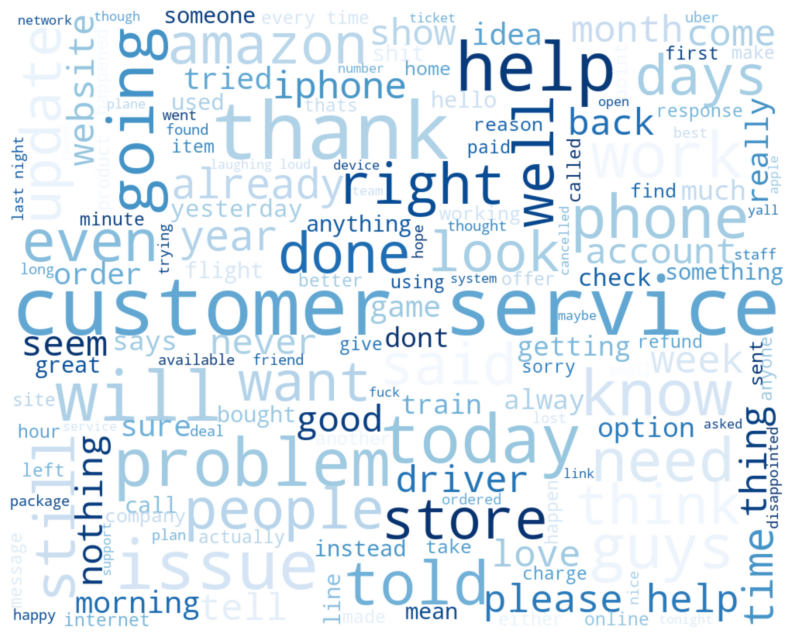

In [65]:
# Let us take a look at the most frequently used word in the tweets
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(doc))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()